# Results of RDFIA's TME 6 and 7

## Imports

### Sys and Python

In [4]:
import sys
sys.path.insert(0, '../src/')

import warnings
warnings.filterwarnings('ignore')

import json
import math
import re

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Graphics

In [8]:
%matplotlib inline
import pandas as pd

import cufflinks as cf; cf.go_offline(connected=True)
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.graph_objs import graph_objs

from __init__ import *

### Source files

In [9]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
loss_acc = pd.read_csv('results/locc_acc_avg.csv')
train_loss = pd.read_csv('results/train_loss.csv')
loss_acc
train_loss

,loss_train_avg,loss_test_avg,top1_acc_train_avg,top1_acc_test_avg
0,2.137960,1.859509,20.970269,32.614715
1,1.677718,1.558587,39.603181,44.264241
2,1.429672,1.340082,48.870684,51.275712


,train_loss
0,2.300853
1,2.300012
2,2.301879
3,2.302365
4,2.300027
5,2.302044
6,2.308021
7,2.303222
8,2.302727
9,2.301266


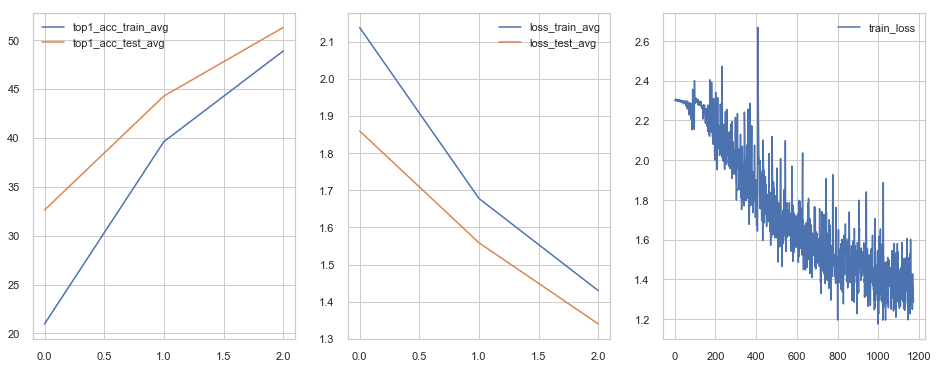

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))
loss_acc.iloc[:, 2:].plot(ax=ax[0])
loss_acc.iloc[:, :2].plot(ax=ax[1]) 
train_loss.plot(ax=ax[2])